In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(ComplexHeatmap))

In [2]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Endothelial/code"

In [3]:
coembed <- readRDS("../data/coembed/coembed.cleaning.Rds")
coembed

An object of class Seurat 
135323 features across 29036 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [43]:
df.known.markers <- read.csv("./known.markers.csv", header = TRUE, sep = "\t")
df.known.markers

EC1_cap,EC5_art,EC3_cap,EC2_cap,EC6_ven,EC7_atria,EC10_CMC.like,EC8_ln,Meso
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
VWF,TM4SF1,HSPA1A,SLC9A3R2,RAMP3,LDB2,VWF,PPFIBP1,PLA2G2A
B2M,SRGN,HSPA1B,RGCC,ACKR1,GMDS,ENG,CCL21,ITLN1
EGFL7,ID1,JUN,TMSB10,PLVAP,LINC02147,HLA-E,MMRN1,C3
TMSB10,S100A6,DNAJB1,IFI27,CALCRL,CEMIP2,EGFL7,TFPI,SAT1
CLDN5,HEY1,UBC,B2M,TGM2,ST6GALNAC3,FLT1,PKHD1L1,HP
HLA-B,A2M,B2M,FABP5,CD74,PCDH7,HLA-C,SEMA3A,PRG4
LGALS3,TMSB10,ZFP36,HLA-B,TSHZ2,EMCN,F8,PTPRE,BNC2
GNG11,SLC9A3R2,HSP90AA1,VWF,SLCO2A1,FOXP1,PECAM1,AKAP12,CCDC80
FABP5,IFI27,HLA-E,HLA-C,HLA-DRA,PCDH15,CLEC14A,FRMD4B,SLPI


In [44]:
## visualize known markers
ctrl <- 20
for(celltype in colnames(df.known.markers)){
    message(glue::glue("computing score for cell type: {celltype}"))
    features <- df.known.markers[, celltype]
    features <- list(features[features != ""])
    coembed <- AddModuleScore(coembed, features= features,
                             name = celltype, ctrl = ctrl)
}


computing score for cell type: EC1_cap

computing score for cell type: EC5_art

computing score for cell type: EC3_cap

computing score for cell type: EC2_cap

computing score for cell type: EC6_ven

computing score for cell type: EC7_atria

computing score for cell type: EC10_CMC.like

computing score for cell type: EC8_ln

computing score for cell type: Meso



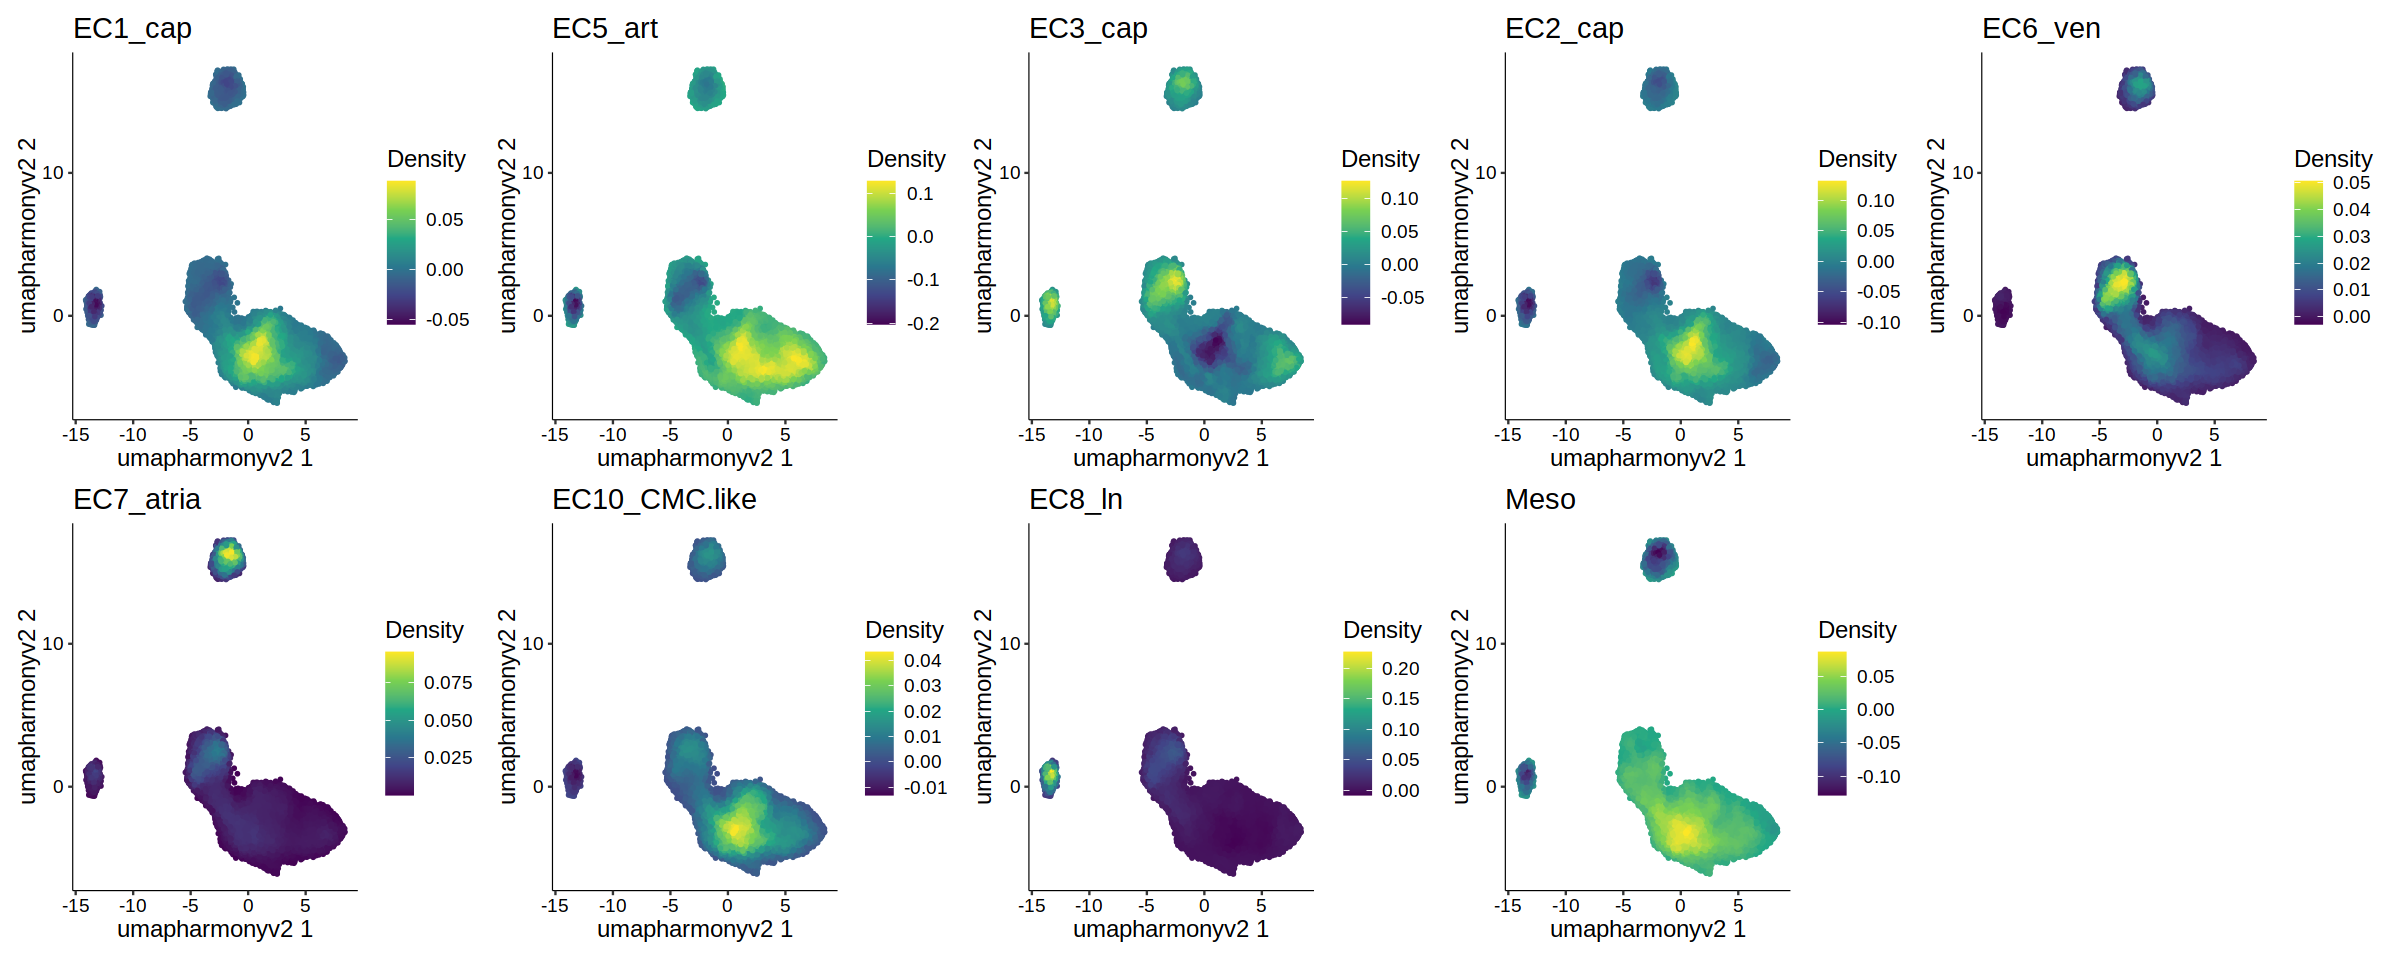

In [47]:
options(repr.plot.height = 8, repr.plot.width = 20)

p1 <- plot_density(coembed, feature = "EC1_cap1", reduction="umap_harmony_v2") + ggtitle("EC1_cap")
p2 <- plot_density(coembed, feature = "EC5_art1", reduction="umap_harmony_v2") + ggtitle("EC5_art")
p3 <- plot_density(coembed, feature = "EC3_cap1", reduction="umap_harmony_v2") + ggtitle("EC3_cap")
p4 <- plot_density(coembed, feature = "EC2_cap1", reduction="umap_harmony_v2") + ggtitle("EC2_cap")
p5 <- plot_density(coembed, feature = "EC6_ven1", reduction="umap_harmony_v2") + ggtitle("EC6_ven")
p6 <- plot_density(coembed, feature = "EC7_atria1", reduction="umap_harmony_v2") + ggtitle("EC7_atria")
p7 <- plot_density(coembed, feature = "EC10_CMC.like1", reduction="umap_harmony_v2") + ggtitle("EC10_CMC.like")
p8 <- plot_density(coembed, feature = "EC8_ln1", reduction="umap_harmony_v2") + ggtitle("EC8_ln")
p9 <- plot_density(coembed, feature = "Meso1", reduction="umap_harmony_v2") + ggtitle("Meso")

p <- patchwork::wrap_plots(list(p1, p2, p3, p4, p5, 
                                p6, p7, p8, p9), ncol = 5)

p

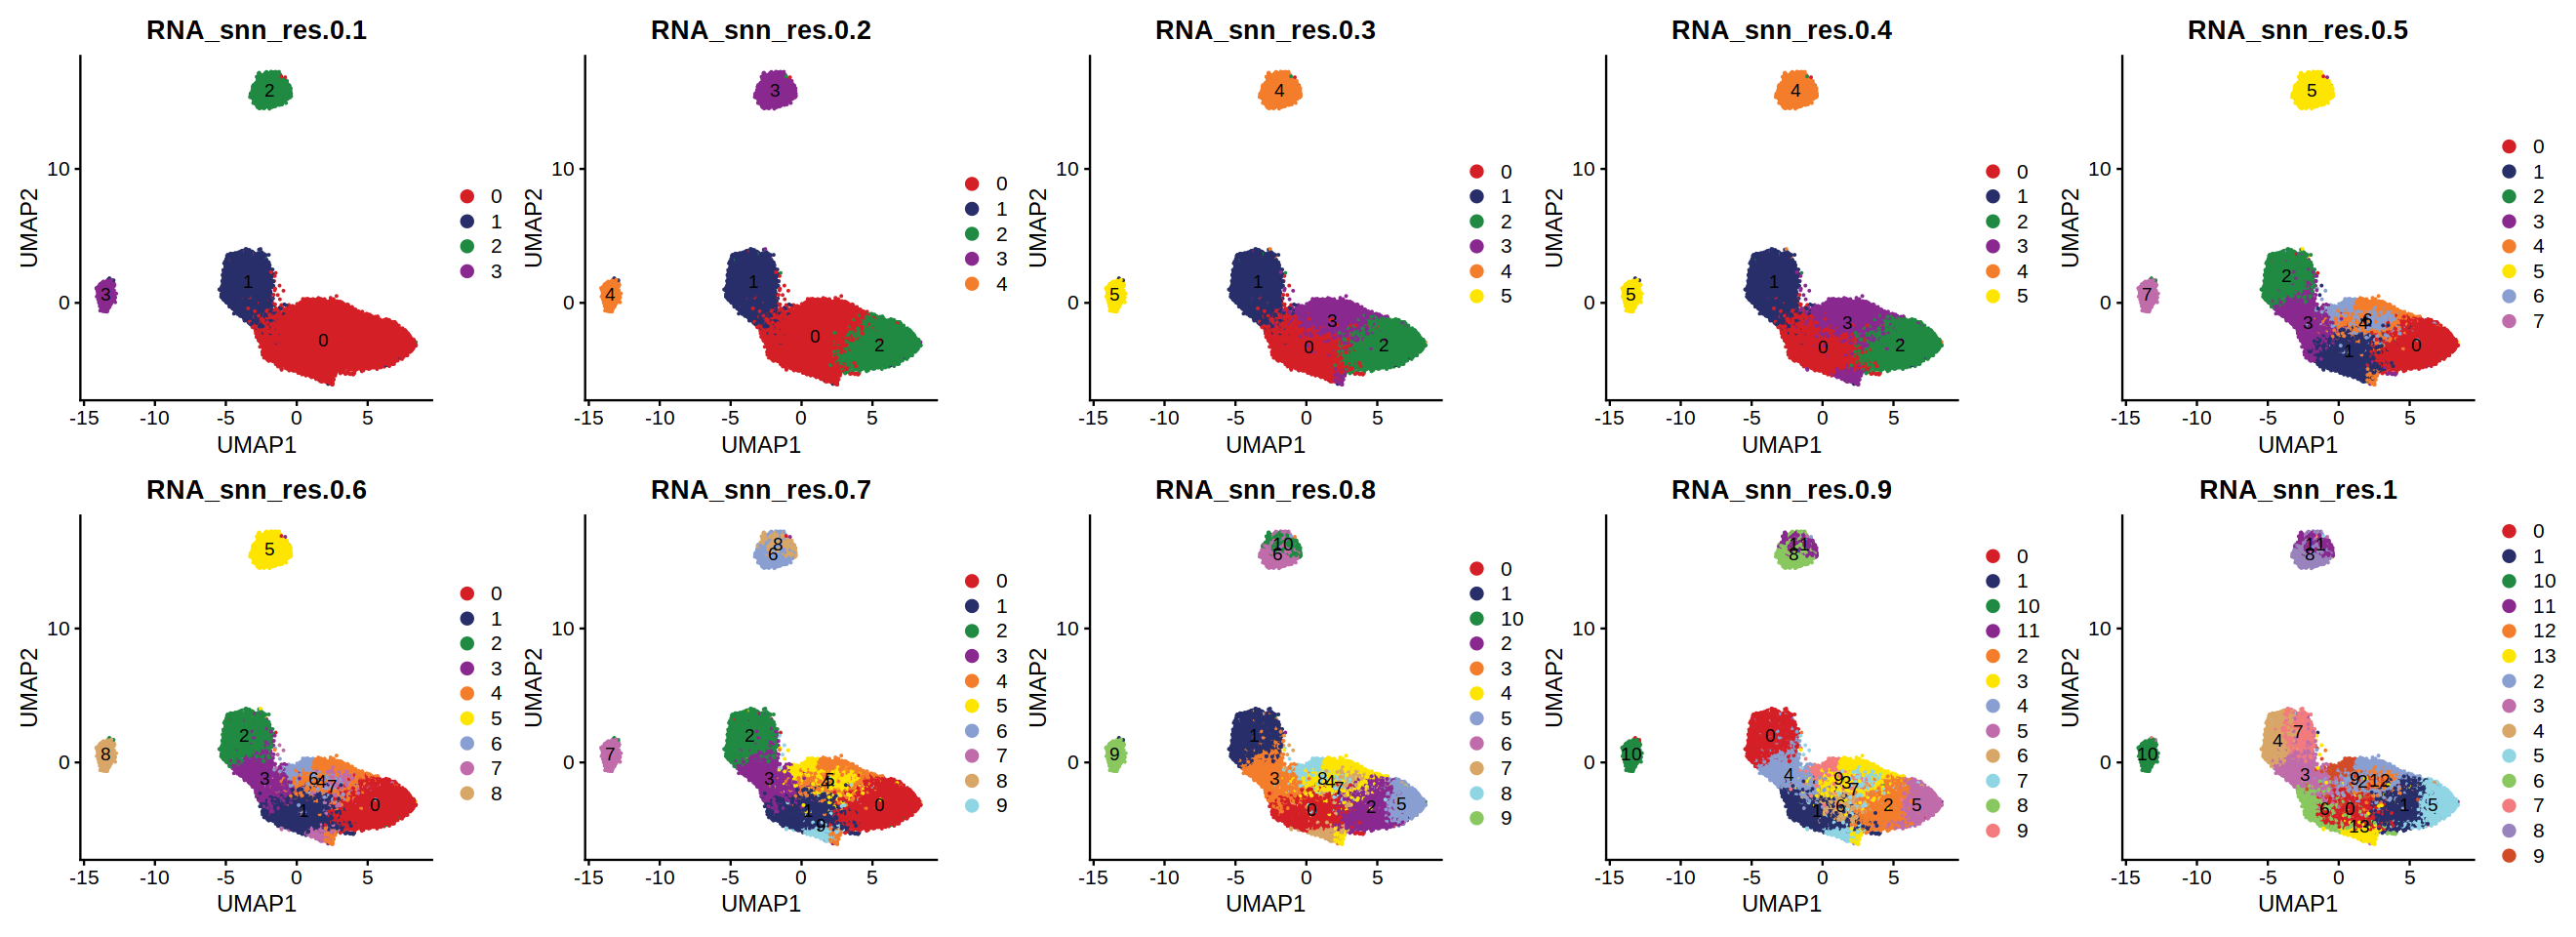

In [48]:
options(repr.plot.height = 8, repr.plot.width = 22)
resolutions <- seq(0.1, 1, 0.1)

plotlist <- lapply(resolutions, function(x){
    cols <- ArchR::paletteDiscrete(coembed@meta.data[, glue::glue("RNA_snn_res.{x}")])
    
    p <- DimPlot(coembed, group.by = glue::glue("RNA_snn_res.{x}"), label = TRUE,
             reduction = "umap_harmony_v2", shuffle = TRUE) +
    scale_color_manual(values = cols) +
    xlab("UMAP1") + ylab("UMAP2")
    
    p
})

p <- patchwork::wrap_plots(plotlist, nrow = 2)

p

Loading required package: ggraph

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


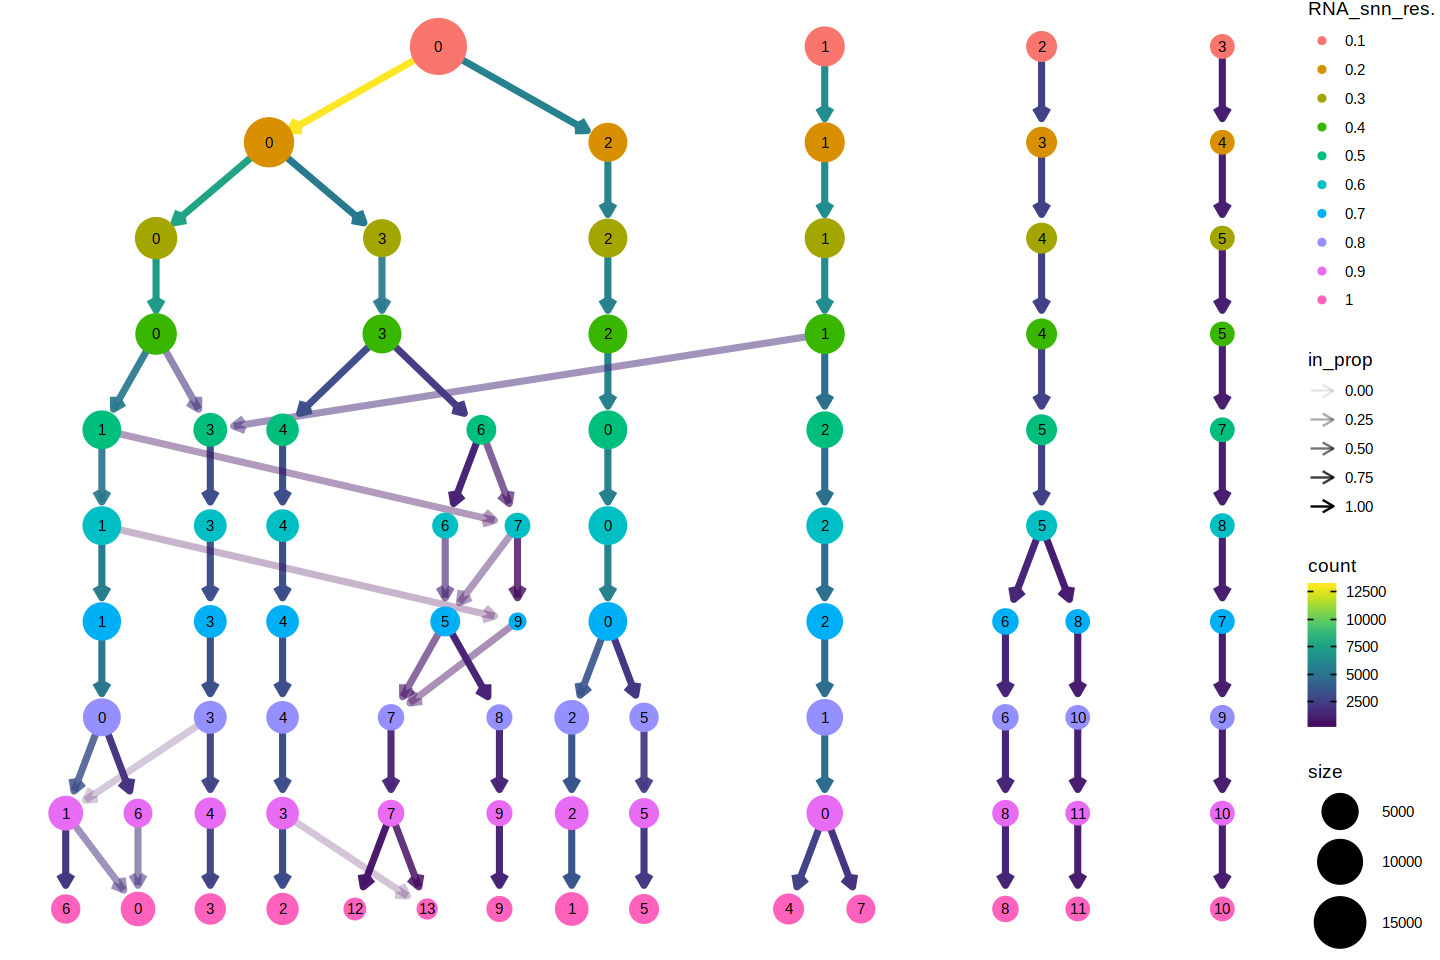

In [49]:
library(clustree)

options(repr.plot.height = 8, repr.plot.width = 12)

clustree(coembed, prefix = "RNA_snn_res.")

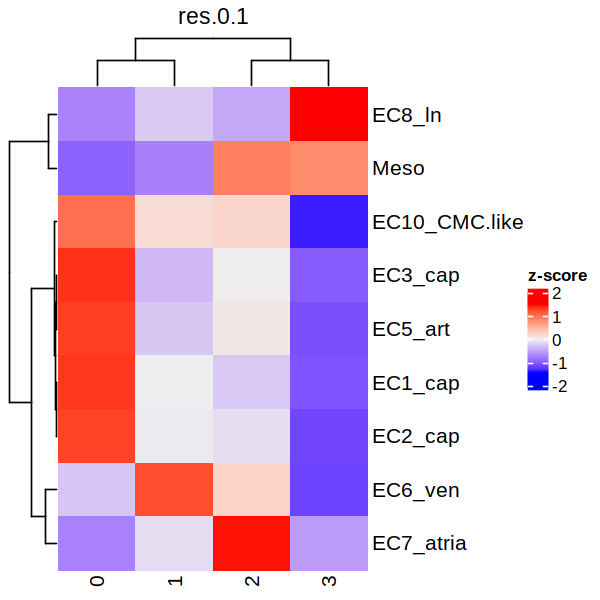

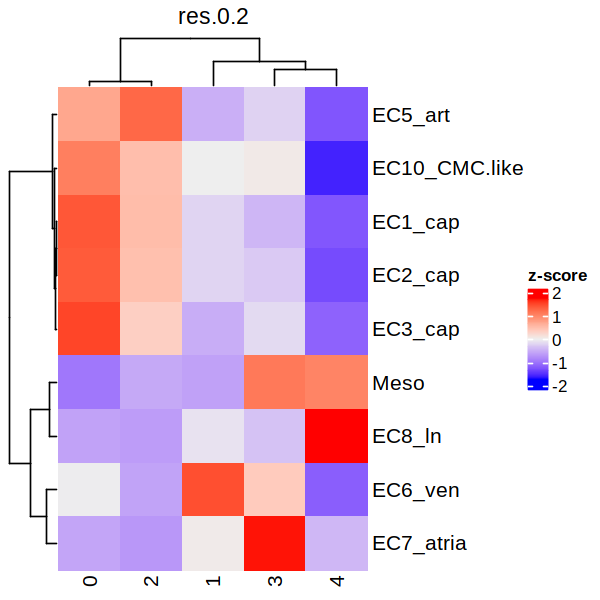

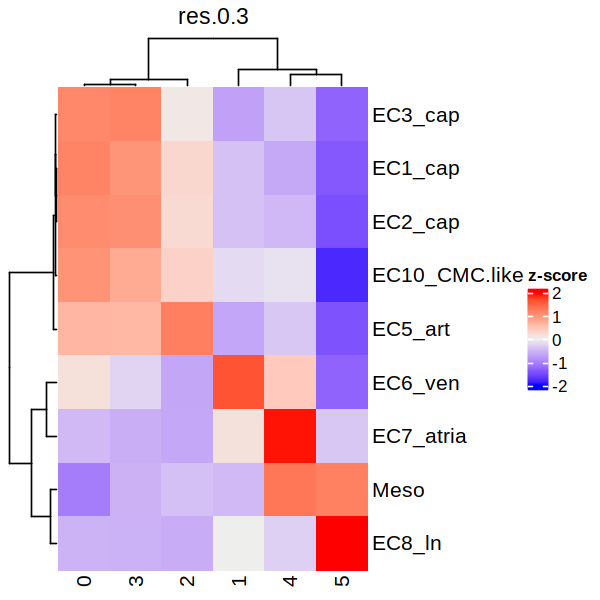

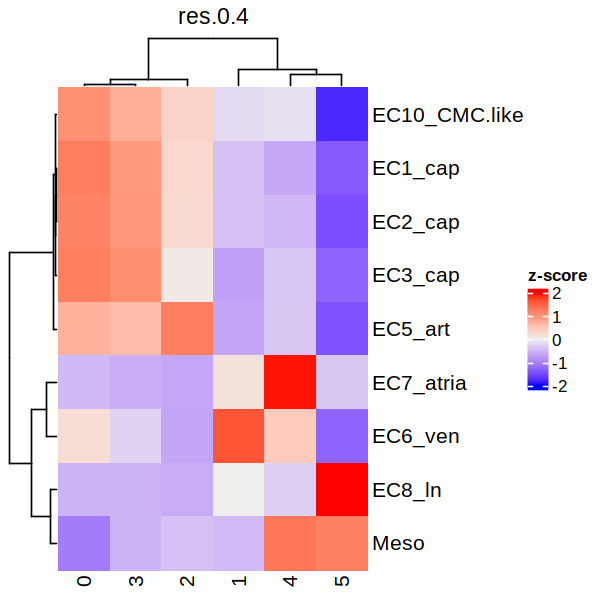

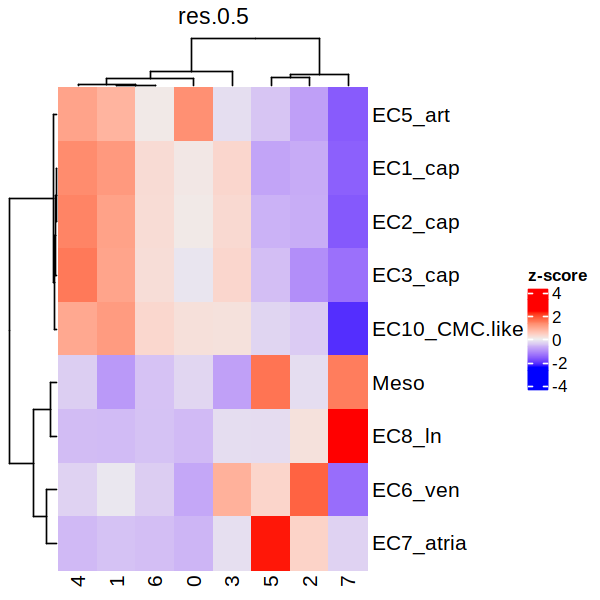

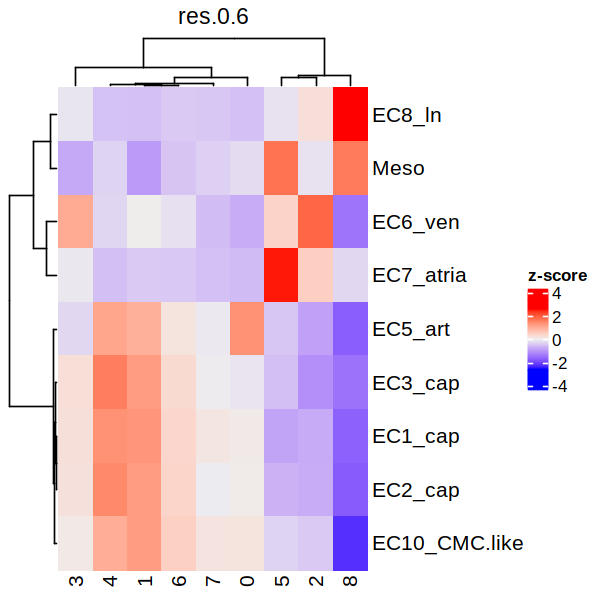

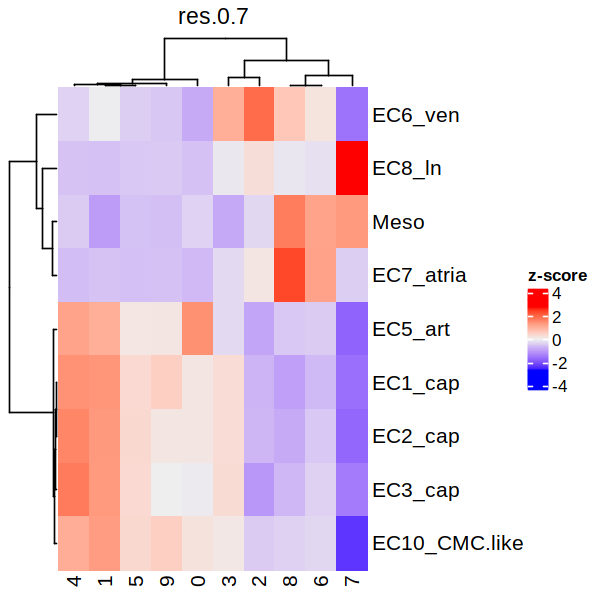

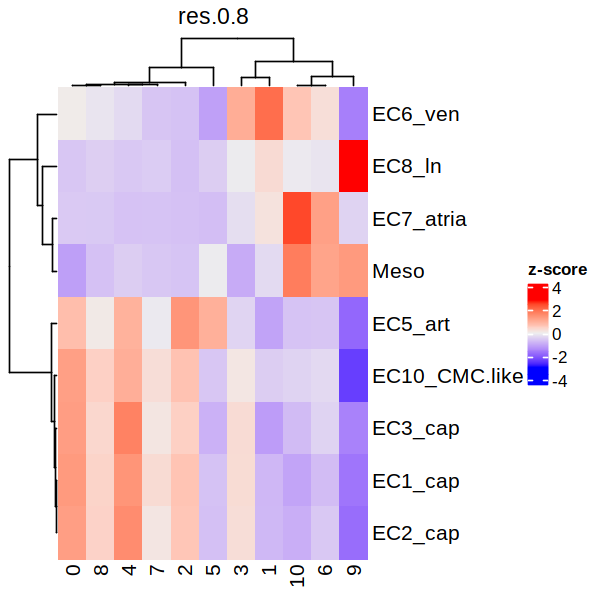

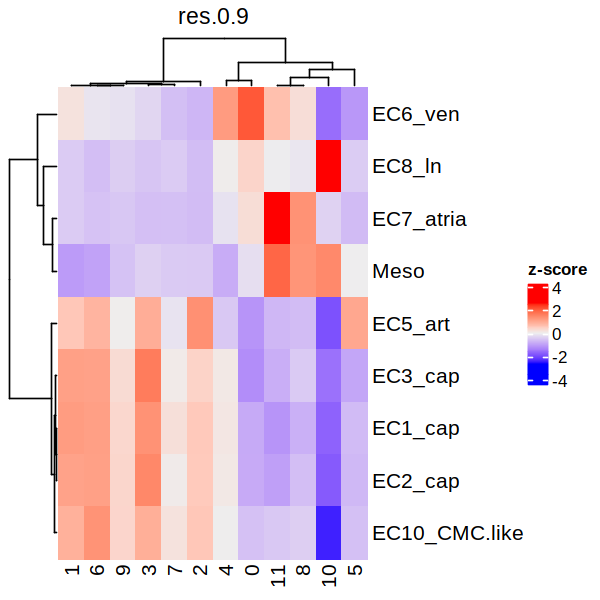

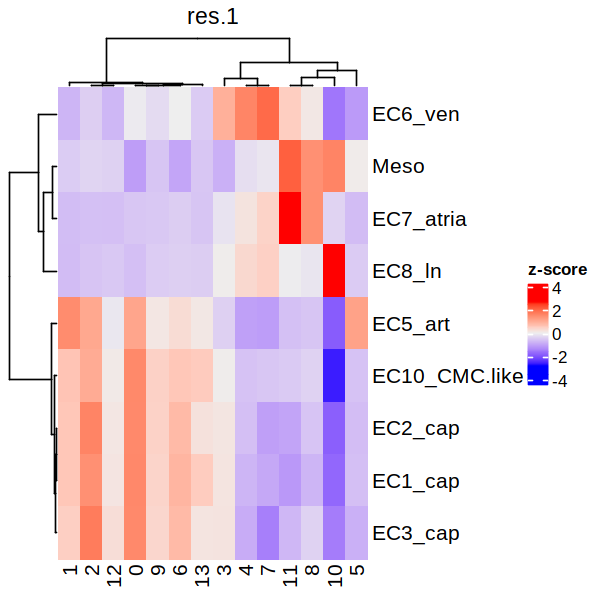

In [50]:
options(repr.plot.height = 5, repr.plot.width = 5)

ht_list <- lapply(resolutions, function(x){
    df <- as.data.frame(coembed@meta.data) %>%
    group_by(across(glue::glue("RNA_snn_res.{x}"))) %>%
    summarise(EC1_cap = mean(EC1_cap1),
             EC5_art = mean(EC5_art1),
             EC3_cap = mean(EC3_cap1),
             EC2_cap = mean(EC2_cap1),
             EC6_ven = mean(EC6_ven1),
             EC7_atria = mean(EC7_atria1),
             EC10_CMC.like = mean(EC10_CMC.like1),
             EC8_ln = mean(EC8_ln1),
             Meso = mean(Meso1)) %>%
    textshape::column_to_rownames(glue::glue("RNA_snn_res.{x}"))
    
    df <- scale(df)
    
    ht <- Heatmap(as.matrix(t(df)),
                 name = "z-score",
                 column_title = glue::glue("res.{x}"),
                 clustering_distance_columns = "pearson",
                 clustering_distance_rows = "pearson",
                 clustering_method_columns = "ward.D2",
                 clustering_method_rows = "ward.D2")

    draw(ht)
})

In [ ]:
# harmony_embedding <- coembed.sub@reductions$harmony@cell.embeddings

# # run PHATE
# phate_embedding <- phate(harmony_embedding, n.jobs = -1, npca = NULL,
#                         knn.dist.method = "cosine")

# colnames(phate_embedding$embedding) <- c("PHATE_1", "PHATE_2")

# coembed.sub[['phate']] <- CreateDimReducObject(embeddings = phate_embedding$embedding)

# cols <- ArchR::paletteDiscrete(coembed.sub@meta.data[, glue::glue("RNA_snn_res.0.5")])

# options(repr.plot.height = 6, repr.plot.width = 6)

# DimPlot(coembed.sub, group.by = "RNA_snn_res.0.5", label = TRUE,
#              reduction = "phate", shuffle = TRUE) +
#     scale_color_manual(values = cols) +
#     xlab("PHATE1") + ylab("PHATE2")

In [51]:
## add annotation
new.cluster.ids <- c("0" = "Capillary_Endo",
               "1" = "Venous_Endo",
               "2" = "Arterial_Endo",
               "3" = "Endocardial_Endo",
               "4" = "Lymphatic_Endo")

Idents(coembed) <- "RNA_snn_res.0.2"

coembed <- RenameIdents(coembed, new.cluster.ids)
coembed$annotation <- Idents(coembed)

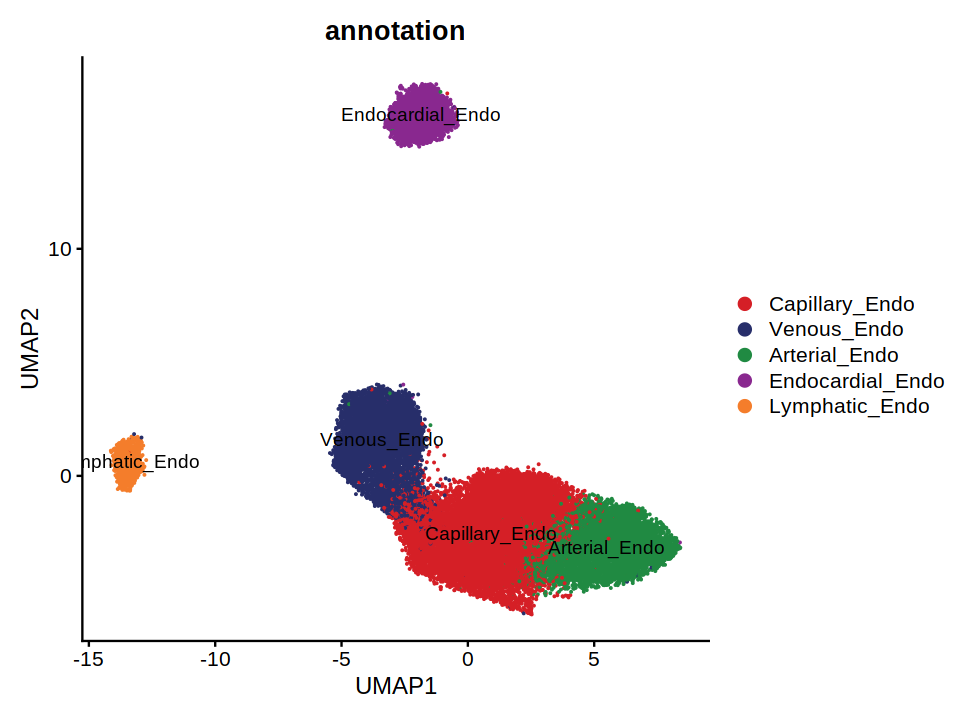

In [53]:
cols.states <- ArchR::paletteDiscrete(coembed@meta.data[, "annotation"])

p <- DimPlot(coembed, group.by = "annotation", label = TRUE,
             reduction = "umap_harmony_v2", shuffle = TRUE) +
    scale_color_manual(values = cols.states) +
    xlab("UMAP1") + ylab("UMAP2")

options(repr.plot.height = 6, repr.plot.width = 8)

p

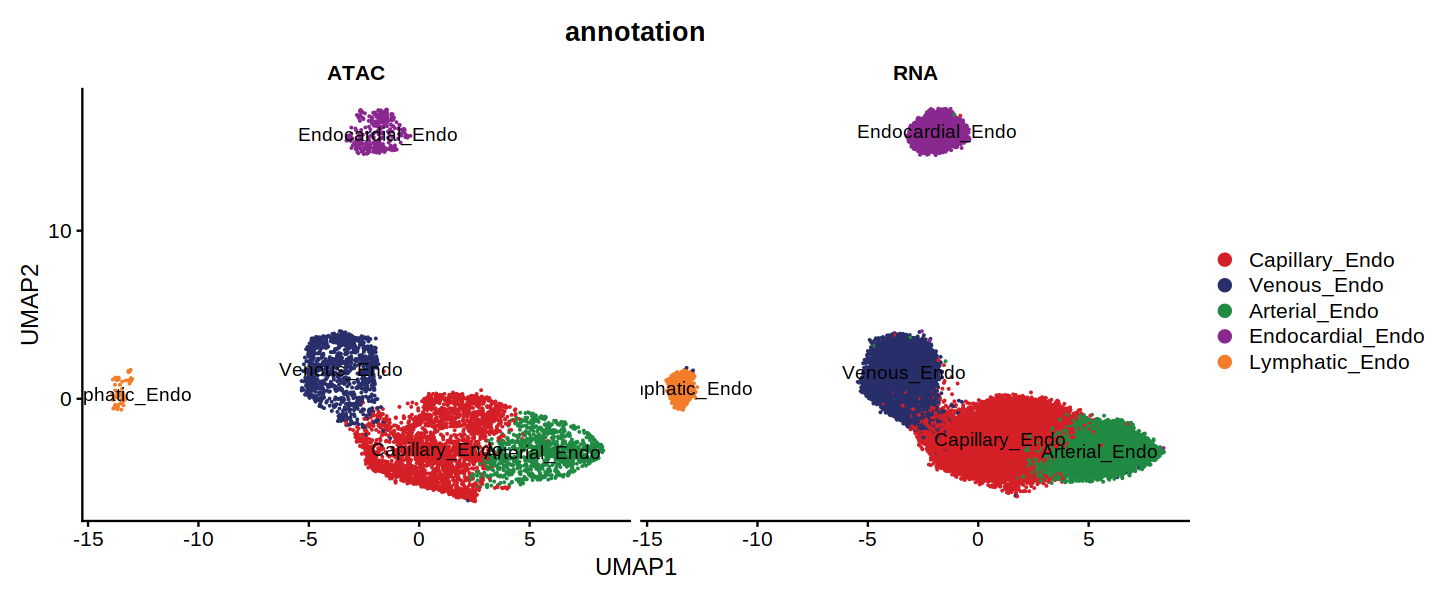

In [54]:
options(repr.plot.width = 12, repr.plot.height = 5)

p <- DimPlot(coembed, group.by = "annotation", label = TRUE,
             reduction = "umap_harmony_v2", shuffle = TRUE, split.by = "tech", cols=cols.states) +
    xlab("UMAP1") + ylab("UMAP2")

p

In [55]:
meta.data <- as.data.frame(coembed@meta.data)

`summarise()` has grouped output by 'patient'. You can override using the `.groups` argument.



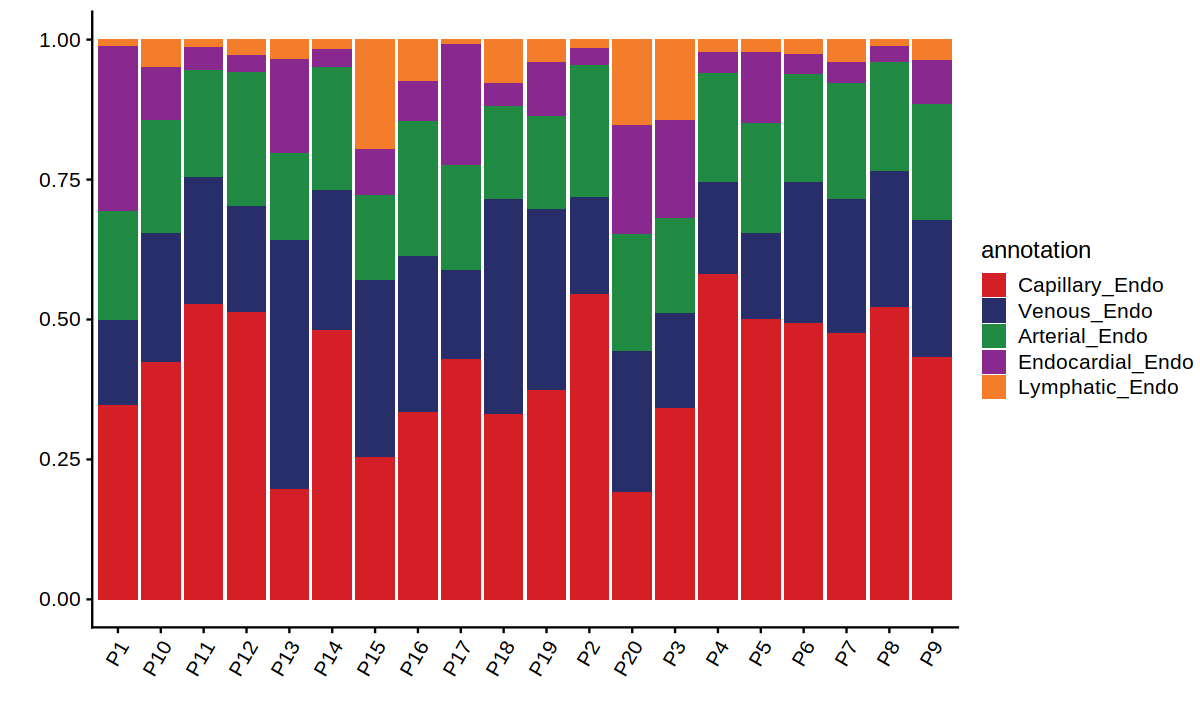

In [56]:
df_plot <-  meta.data %>%
    group_by(patient, annotation) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient, cell_proportion, fill=annotation)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols.states) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'region'. You can override using the `.groups` argument.



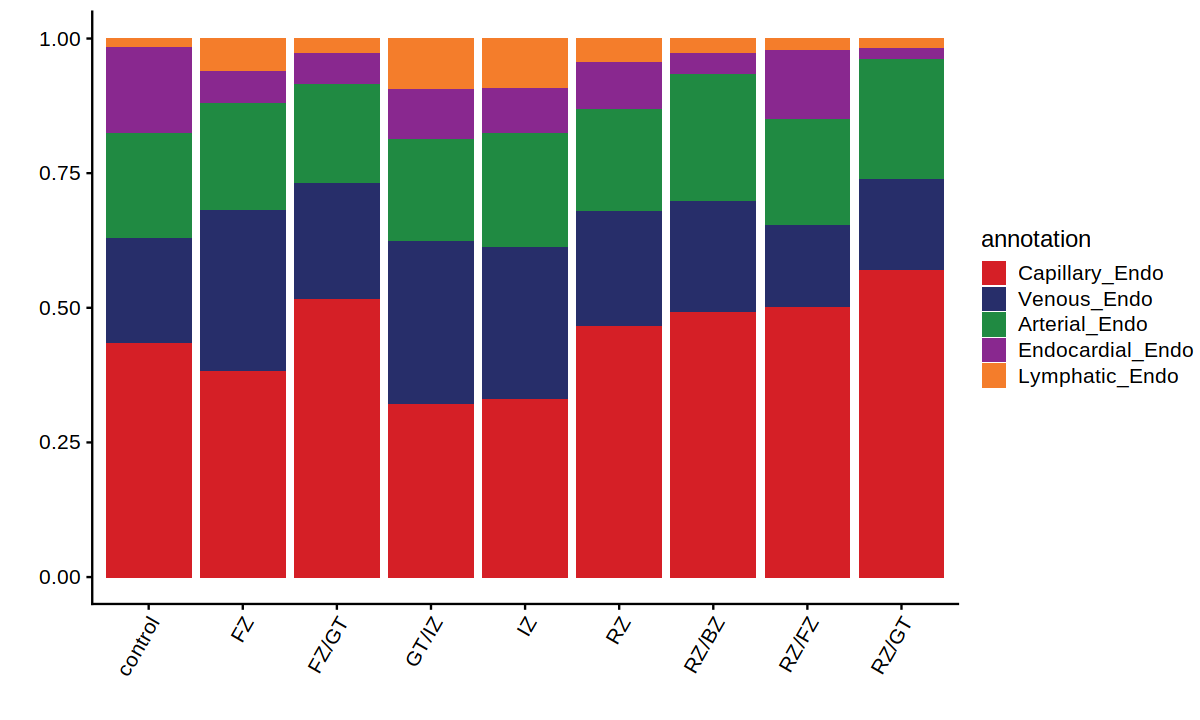

In [57]:
df_plot <- meta.data %>%
    group_by(region, annotation) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(region, cell_proportion, fill=annotation)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols.states) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 10, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_group'. You can override using the `.groups` argument.



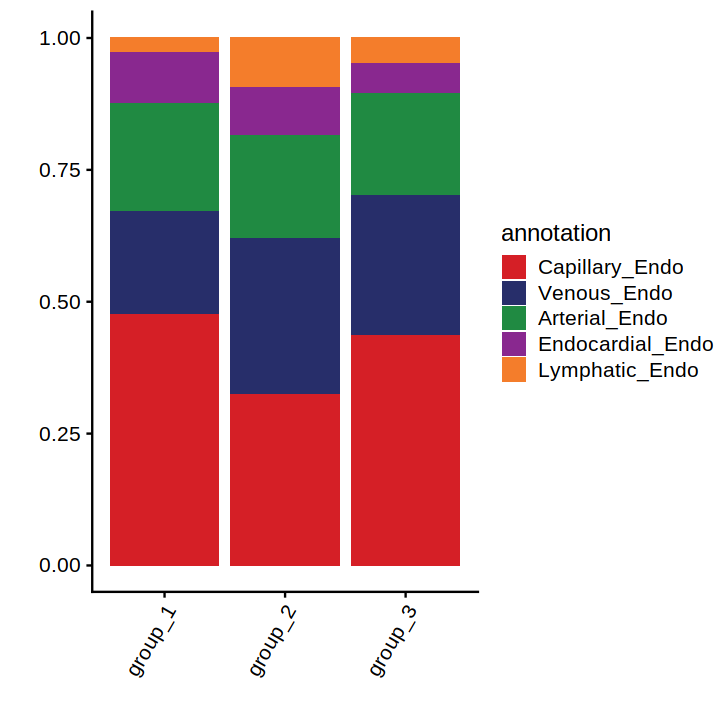

In [58]:
df_plot <- meta.data %>%
    group_by(patient_group, annotation) %>%
    summarise(counts = n()) %>%
    mutate(cell_proportion = counts / sum(counts))

p1 <- ggplot(df_plot, aes(patient_group, cell_proportion, fill=annotation)) + 
    geom_bar(stat="identity", position = position_stack(reverse = TRUE)) +
    scale_fill_manual(values = cols.states) +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


options(repr.plot.width = 6, repr.plot.height = 6)

p1

`summarise()` has grouped output by 'patient_region_id'. You can override using the `.groups` argument.



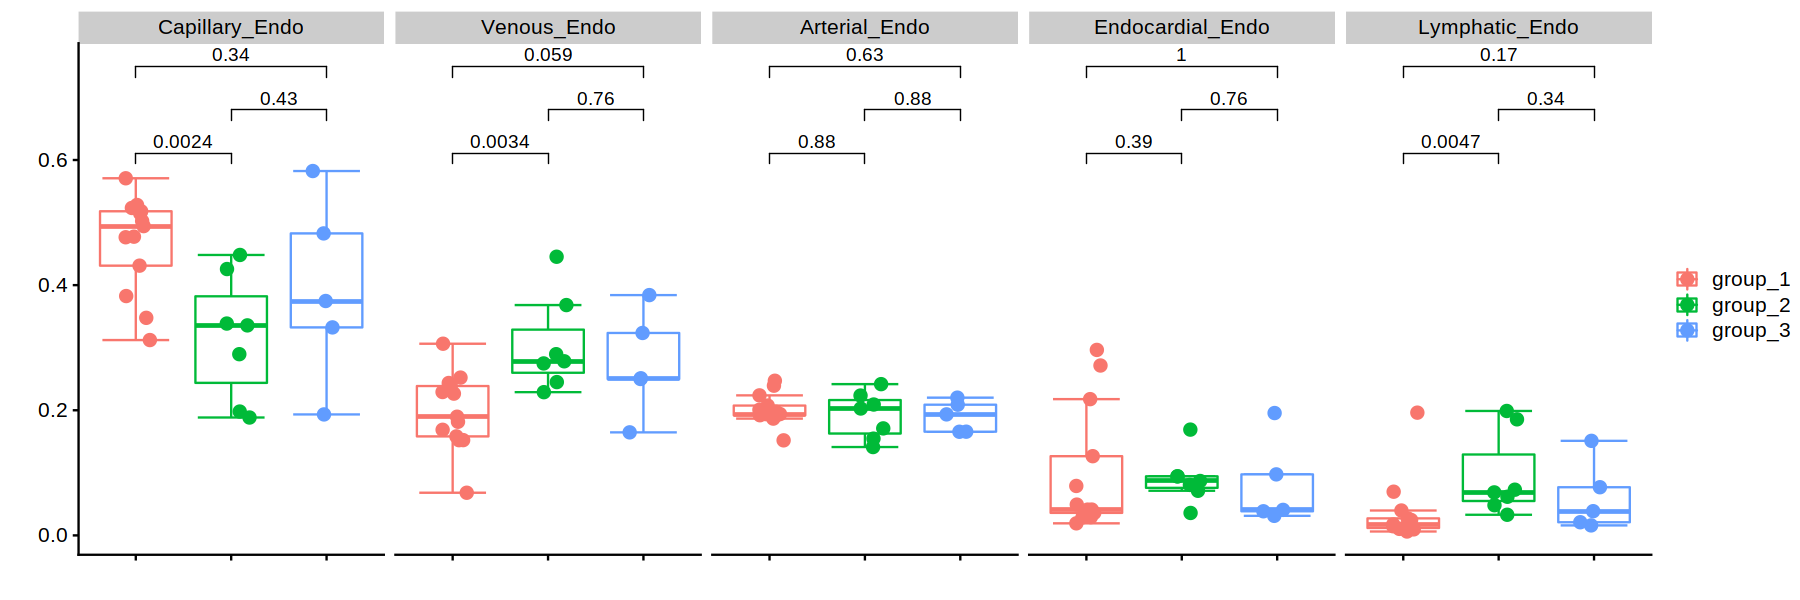

In [59]:
df_plot <- meta.data %>% 
            group_by(patient_region_id, annotation) %>%
            summarise(counts = n()) %>%
            mutate(proportion = counts / sum(counts))

df_anno <- coembed@meta.data %>%
    as.data.frame() %>%
    subset(., select = c("patient_region_id", "patient_group")) %>%
    unique()

df_plot <- merge.data.frame(df_plot, df_anno)
    
    p <- ggplot(data = df_plot, aes(x = patient_group, y = proportion)) +
    geom_boxplot2(aes(color = patient_group)) +
    geom_point(aes(color = patient_group), position = position_jitterdodge(), size = 3) +
    facet_wrap(~annotation, nrow = 1) +
    stat_compare_means(comparisons = list(c("group_1", "group_2"),
                                         c("group_2", "group_3"),
                                         c("group_1", "group_3")),
                   method = "wilcox.test") +
    theme_cowplot() +
    xlab("") + ylab("") +
    theme(axis.text.x = element_blank(),
         legend.title = element_blank())

options(repr.plot.width = 15, repr.plot.height = 5)

print(p)

In [ ]:
Idents(coembed) <- "annotation"

In [ ]:
all.markers <- FindAllMarkers(coembed, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
    
df <- all.markers %>%
    group_by(cluster) %>%
    slice_max(n = 10, order_by = avg_log2FC)

p <- DotPlot(coembed, features = unique(df$gene)) + RotatedAxis()
    
options(repr.plot.height = 5, repr.plot.width = 18)

print(p)

In [ ]:
if(!dir.exists("../data/coembed/MarkerGenesAfterAnnotation")){
    dir.create("../data/coembed/MarkerGenesAfterAnnotation")
}

In [ ]:
markerList <- split(all.markers, all.markers$cluster)
    
    for(i in 1:length(markerList)){
        markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$avg_log2FC), ]
    }
    
    WriteXLS::WriteXLS(markerList,
                   ExcelFileName = glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.xlsx"),
                   SheetNames = names(markerList))

saveRDS(all.markers, glue::glue("../data/coembed/MarkerGenesAfterAnnotation/annotation.rds"))

In [ ]:
saveRDS(coembed, file = "../data/coembed/coembed.annotation.Rds")

In [ ]:
sessionInfo()